


## How Databases and Web Services Fit Into the Picture
They are an interesting hybrid, they store non-volatile data from the perspective of the python program, but access to them introduces elements of volatility:
1. **Non-Volatile:** Data persists when the Python kernel/interpreter is shut down.
2. **Volatile:** Unlike files, a database can be unavailable (e.g., server downtime), and data integrity can be affected by concurrent access.

In a structured **progression from volatile to non-volatile** data, databases fit in as **external but queryable structures**:
- Unlike files, they support **efficient querying** (e.g., SQL queries).
- Unlike in-memory Python data structures, they **persist beyond execution**.
- Unlike JSON or CSV files, they allow **dynamic updates and complex relationships**.



### Brief Overview of APIs
We will use Application Program Interfaces (APIs) throughout this course as they enable software programs to communicate with each other. The API defines a set of rules that allow the two programs to communicate with each other, and when that communication involves external data structures the API defines:

 **1. Endpoint (Exposes Data)**
   - The URL where the API listens.
   - Example: `https://query.wikidata.org/sparql`

 **2. Request/Response Model (How Data is Sent and Received)**
   - Defines the protocol and request method.
   - **REST APIs**: `GET`, `POST` over HTTP.
   - **SPARQL APIs**: SPARQL Query over HTTP (`GET`/`POST`).
   - **Database APIs**: SQL queries over TCP/IP.

 **3. Data Format (How Data is Structured)**
   - **REST APIs**: JSON, XML, CSV.
   - **SPARQL APIs**: SPARQL-JSON, RDF/XML, Turtle, N-Triples.
   - **Databases**: Tabular data (Relational Tables).
   - **GraphQL APIs**: JSON (Custom queries).
     
We will dive deeper into APIs as the course proceeds, but you need to understand what they are and what they do.

# What is a Database? 

A **database** is like a super-organized digital filing system where you store, manage, and retrieve information efficiently. Instead of using multiple text files or spreadsheets, a database helps keep data structured, searchable, and scalable.  

Imagine you’re running a **chemical inventory** for a lab. You could store data in a spreadsheet (`CSV file`), but as the dataset grows, searching, updating, and ensuring accuracy becomes difficult. A **database** solves this by organizing data into a structured system that allows for efficient searching, sorting, and updating.

---

## SQL vs. NoSQL: Two Ways to Organize a Database
Databases come in two major types: **SQL (Structured Query Language) databases** and **NoSQL (Not Only SQL) databases**.  

### SQL Databases: Like a Well-Organized Filing Cabinet
📂 **Think of SQL databases as an Excel spreadsheet where everything is stored in structured tables.**  
- Data is organized into **tables** with **rows (records)** and **columns (fields)**.  
- You must **predefine the structure** (e.g., a table for chemical compounds must always have columns like “Name,” “Formula,” and “Molecular Weight”).  
- Data is retrieved using **SQL queries**, like asking a librarian for a specific book.  
- Best for structured data with **relationships** (e.g., linking a chemical sample to a supplier).  
- Examples: **SQLite, PostgreSQL, MySQL, Microsoft SQL Server.**  

📌 **Analogy:**  
- If you store lab results in a filing cabinet with labeled folders, SQL databases ensure everything follows a strict structure.
- Example SQL query:  
  ```sql
  SELECT * FROM chemicals WHERE molecular_weight > 200;
  ```
  *(Find all chemicals with a molecular weight above 200.)*

---

### NoSQL Databases: Like a Digital Whiteboard
📝 **NoSQL databases are more flexible, like sticky notes on a whiteboard that can change anytime.**  
- Instead of structured tables, data is stored as **documents, key-value pairs, graphs, or columns**.  
- You don’t need a strict structure—different records can have different fields.  
- Great for **large, flexible datasets** that may change often (e.g., tracking real-time sensor data).  
- Common in big data, web applications, and IoT (Internet of Things).  
- Examples: **MongoDB (document-based), Redis (key-value), Cassandra (column-based).**  

📌 **Analogy:**  
- If SQL is like an Excel spreadsheet, **NoSQL is like a collection of Google Docs**—each document can have a different format.  
- Example MongoDB NoSQL document (JSON-like format):  
  ```json
  {
    "name": "Acetone",
    "formula": "C3H6O",
    "properties": {
      "molecular_weight": 58.08,
      "boiling_point": 56.5
    }
  }
  ```
  *(Flexible—some documents may have extra fields, some may not.)*

---

#### How to Choose?
| Feature         | SQL Databases (Structured) | NoSQL Databases (Flexible) |
|---------------|-------------------------|-------------------------|
| **Data Structure** | Organized in tables (rows & columns) | Documents, key-value, graphs |
| **Flexibility**  | Fixed structure (schema) | Dynamic structure (schema-less) |
| **Best For** | Structured, relational data (e.g., patient records, inventory) | Big data, fast-changing data (e.g., IoT, social media) |
| **Query Language** | Uses SQL (structured queries) | Uses APIs, JSON-like queries |
| **Examples** | SQLite, PostgreSQL, MySQL | MongoDB, Redis, Firebase |

---

#### Putting It All Together
- **SQL is best for structured, well-defined data** (like lab inventory).  
- **NoSQL is better for rapidly changing, unstructured data** (like real-time sensor readings).  
- Both are **external data storage** solutions that move data from volatile (RAM) to non-volatile storage, ensuring persistence.  


## Understanding Databases
The core role of a database is to efficiently and persistently **store data** and in a structured and usefule manner **allow access to the data.** These goals can be achieved through 5 key database activities.

| **Key Database Activity** | **Purpose** |
|---------------------------|-------------|
| **1. Transactions (Data Modification & Integrity)** | Manage data changes (`INSERT`, `UPDATE`, `DELETE`) as atomic units, ensuring consistency with commit & rollback mechanisms. |
| **2. Schema Management** | Define tables, columns, relationships, and constraints to **structure the data**. |
| **3. Data Querying & Retrieval** | Access stored data without modifying it (`SELECT` queries), allowing filtering, aggregation, and reporting. |
| **4. Indexing & Optimization** | Speed up data access and searches by using indexes and optimizing queries for performance. |
| **5. Concurrency & Multi-User Access** | Manage simultaneous access to prevent conflicts and ensure data consistency across multiple users. |

# SQLite
SQLite is a single file SQL database that can be generated and manipulated with the Python sqlite3 built-in module. Unlike larger SQL databases (MySQL, PostgreSQL,..) it does not require running a database server, and so it is an excellent tool to introduce basic database functions with. In this tutorial we will convert the PubChemElements.csv file to a SQLite database and perform some basic operations with it.



### The Role of SQLite in the SQL Ecosystem
| Feature | SQLite | Server-Based SQL (MySQL, PostgreSQL) |
|---------|--------|--------------------------------------|
| Setup | No setup needed (file-based) | Requires installation & server |
| Best For | Local storage, embedded apps, small projects | Large-scale web applications, enterprise systems |
| Performance | Fast for small datasets | Scales well with huge data |
| Concurrency | Limited multi-user access | Handles multiple users simultaneously |
| Portability | Just a single `.db` file | Requires database servers & configurations |

## SQLite Objects (Classes)
Databases involve several key operations and there are several SQLite python objects (classes) that we need to understand in order to communicate with and manipulate data within a SQLite database.  These are
   1. **Connection:** Handles database access of a session (open, close, commit, rollback).
   2. **Cursor:** Handles query execution and navigation, you can have multiple cursor objects in a connection.

Since SQLite is, making it a great tool for small to medium datasets, research projects, and prototyping.


#### **🔹 Connection Methods (`sqlite3.Connection`)**
| Method | Description |
|--------|-------------|
| `connect(database)` | Opens a connection to the SQLite database file. |
| `close()` | Closes the connection to free up resources. |
| `commit()` | Saves (commits) changes to the database. |
| `rollback()` | Rolls back uncommitted changes. |
| `cursor()` | Creates a cursor object to execute SQL commands. |
| `execute(sql, params)` | Executes a single SQL command. |
| `executemany(sql, seq_of_params)` | Executes a SQL command multiple times with different values. |

---

#### **🔹 Cursor Methods (`sqlite3.Cursor`)**
| Method | Description |
|--------|-------------|
| `execute(sql, params)` | Executes a SQL query. |
| `executemany(sql, seq_of_params)` | Executes a batch of SQL queries. |
| `fetchone()` | Fetches the next row of the result set. |
| `fetchall()` | Fetches all remaining rows of the result set. |
| `fetchmany(size)` | Fetches `size` number of rows. |
| `description` | A tuple containing metadata about the columns. |

---


#### **📜 Common Database Tasks in SQLite**
| Task | SQL Query | SQLite (`sqlite3`) Example |
|------|----------|--------------------------|
| **Show all tables** | `SELECT name FROM sqlite_master WHERE type='table';` | `cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")` |
| **Show table structure** | `PRAGMA table_info(elements);` | `cursor.execute("PRAGMA table_info(elements);")` |
| **Get all records** | `SELECT * FROM elements;` | `cursor.execute("SELECT * FROM elements;")` |
| **Get first 5 records** | `SELECT * FROM elements LIMIT 5;` | `cursor.execute("SELECT * FROM elements LIMIT 5;")` |
| **Find specific element** | `SELECT * FROM elements WHERE symbol='H';` | `cursor.execute("SELECT * FROM elements WHERE symbol='H';")` |
| **Filter by condition** | `SELECT name, symbol FROM elements WHERE boiling_point < 25;` | `cursor.execute("SELECT name, symbol FROM elements WHERE boiling_point < 25;")` |
| **Sort results** | `SELECT * FROM elements ORDER BY atomic_mass DESC;` | `cursor.execute("SELECT * FROM elements ORDER BY atomic_mass DESC;")` |
| **Insert new record** | `INSERT INTO elements (symbol, name, atomic_mass) VALUES ('Xx', 'XenonX', 200);` | `cursor.execute("INSERT INTO elements (symbol, name, atomic_mass) VALUES (?, ?, ?)", ('Xx', 'XenonX', 200))` |
| **Update a record** | `UPDATE elements SET atomic_mass=18.02 WHERE symbol='H2O';` | `cursor.execute("UPDATE elements SET atomic_mass=? WHERE symbol=?", (18.02, 'H2O'))` |
| **Delete a record** | `DELETE FROM elements WHERE symbol='Xx';` | `cursor.execute("DELETE FROM elements WHERE symbol=?", ('Xx',))` |


# SQLite Activity
## Create a Database from PubChemElements_all.csv

In [1]:
import sqlite3
import pandas as pd
import os

# Define the directory structure
base_data_dir = os.path.expanduser("~/data")  # Parent directory
pubchem_data_dir = os.path.join(base_data_dir, "pubchem_data")  # Subdirectory for PubChem
os.makedirs(pubchem_data_dir, exist_ok=True)  # Ensure directories exist

# Define file paths
csv_file_path = os.path.join(pubchem_data_dir, "PubChemElements_all.csv")
db_file_path = os.path.join(pubchem_data_dir, "periodic_table.db")  # SQLite database file

# Load CSV file into Pandas DataFrame
df = pd.read_csv(csv_file_path)

# Connect to SQLite database (creates the file if it doesn’t exist)
conn = sqlite3.connect(db_file_path)
cursor = conn.cursor()

# Create table (adjust column names to match CSV headers)
cursor.execute("""
CREATE TABLE IF NOT EXISTS elements (
    atomic_number INTEGER PRIMARY KEY,
    symbol TEXT NOT NULL,
    name TEXT NOT NULL,
    atomic_mass REAL,
    density REAL,
    melting_point REAL,
    boiling_point REAL
)
""")

# Insert data from DataFrame into SQLite table
df.to_sql("elements", conn, if_exists="replace", index=False)

# Commit changes and close connection
conn.commit()
conn.close()

## Print Tables in Database

In [11]:
import sqlite3

#conn = sqlite3.connect("/home/rebelford/data/pubchem_data/periodic_table.db")
conn = sqlite3.connect(db_file_path)
cursor = conn.cursor()

cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

print("Tables in the database:", tables)
conn.close()

Tables in the database: [('elements',)]


## Print Fields (Columns) in Database

In [12]:
conn = sqlite3.connect(db_file_path)
cursor = conn.cursor()

cursor.execute("PRAGMA table_info(elements);")
fields = [row[1] for row in cursor.fetchall()]

print("Fields in the 'elements' table:", fields)
conn.close()

Fields in the 'elements' table: ['AtomicNumber', 'Symbol', 'Name', 'AtomicMass', 'CPKHexColor', 'ElectronConfiguration', 'Electronegativity', 'AtomicRadius', 'IonizationEnergy', 'ElectronAffinity', 'OxidationStates', 'StandardState', 'MeltingPoint', 'BoilingPoint', 'Density', 'GroupBlock', 'YearDiscovered']


## Print first 5 Records (rows)

In [13]:
conn = sqlite3.connect(db_file_path)
cursor = conn.cursor()

cursor.execute("SELECT * FROM elements LIMIT 5;")
records = cursor.fetchall()

for record in records:
    print(record)

conn.close()

(1, 'H', 'Hydrogen', 1.008, 'FFFFFF', '1s1', 2.2, 120.0, 13.598, 0.754, '+1, -1', 'Gas', 13.81, 20.28, 8.988e-05, 'Nonmetal', '1766')
(2, 'He', 'Helium', 4.0026, 'D9FFFF', '1s2', None, 140.0, 24.587, None, '0', 'Gas', 0.95, 4.22, 0.0001785, 'Noble gas', '1868')
(3, 'Li', 'Lithium', 7.0, 'CC80FF', '[He]2s1', 0.98, 182.0, 5.392, 0.618, '+1', 'Solid', 453.65, 1615.0, 0.534, 'Alkali metal', '1817')
(4, 'Be', 'Beryllium', 9.012183, 'C2FF00', '[He]2s2', 1.57, 153.0, 9.323, None, '+2', 'Solid', 1560.0, 2744.0, 1.85, 'Alkaline earth metal', '1798')
(5, 'B', 'Boron', 10.81, 'FFB5B5', '[He]2s2 2p1', 2.04, 192.0, 8.298, 0.277, '+3', 'Solid', 2348.0, 4273.0, 2.37, 'Metalloid', '1808')


## Find Elements that are gases at 25 deg C

In [14]:
conn = sqlite3.connect(db_file_path)
cursor = conn.cursor()

cursor.execute("SELECT name, symbol FROM elements WHERE BoilingPoint - 273.15 < 25;")
gases = cursor.fetchall()

print("Elements that are gases at room temperature:")
for gas in gases:
    print(gas)
cursor.execute("SELECT name, BoilingPoint FROM elements WHERE name LIKE 'Oxygen';")
print(cursor.fetchall())  # Check Oxygen's boiling point

conn.close()

Elements that are gases at room temperature:
('Hydrogen', 'H')
('Helium', 'He')
('Nitrogen', 'N')
('Oxygen', 'O')
('Fluorine', 'F')
('Neon', 'Ne')
('Chlorine', 'Cl')
('Argon', 'Ar')
('Krypton', 'Kr')
('Xenon', 'Xe')
('Radon', 'Rn')
[('Oxygen', 90.2)]


## Find Element with Largest Atomic Mass

In [15]:
conn = sqlite3.connect(db_file_path)
cursor = conn.cursor()

cursor.execute("SELECT name, symbol, AtomicMass FROM elements ORDER BY AtomicMass DESC LIMIT 1;")
heaviest_element = cursor.fetchone()

print("Heaviest element:", heaviest_element)
conn.close()

Heaviest element: ('Oganesson', 'Og', 295.216)


In [30]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect(db_file_path)
conn.row_factory = sqlite3.Row  # Enables column name access

# Create a cursor
cursor = conn.cursor()

# Fetch all records
cursor.execute("SELECT * FROM elements")
rows = cursor.fetchall()

# Extract the 'Name' column into a list
element_names = [row["Name"] for row in rows]

# Extract 'Symbol' and 'Electronegativity' into a Pandas DataFrame
data = [(row["Symbol"], row["Electronegativity"]) for row in rows]
df_electronegativity = pd.DataFrame(data, columns=["Symbol", "Electronegativity"])

# Close the connection
conn.close()

# Print results
print(element_names)  # List of element names
print(df_electronegativity)  # Pandas DataFrame
print(type(df_electronegativity))
print(df_electronegativity.head())



['Hydrogen', 'Helium', 'Lithium', 'Beryllium', 'Boron', 'Carbon', 'Nitrogen', 'Oxygen', 'Fluorine', 'Neon', 'Sodium', 'Magnesium', 'Aluminum', 'Silicon', 'Phosphorus', 'Sulfur', 'Chlorine', 'Argon', 'Potassium', 'Calcium', 'Scandium', 'Titanium', 'Vanadium', 'Chromium', 'Manganese', 'Iron', 'Cobalt', 'Nickel', 'Copper', 'Zinc', 'Gallium', 'Germanium', 'Arsenic', 'Selenium', 'Bromine', 'Krypton', 'Rubidium', 'Strontium', 'Yttrium', 'Zirconium', 'Niobium', 'Molybdenum', 'Technetium', 'Ruthenium', 'Rhodium', 'Palladium', 'Silver', 'Cadmium', 'Indium', 'Tin', 'Antimony', 'Tellurium', 'Iodine', 'Xenon', 'Cesium', 'Barium', 'Lanthanum', 'Cerium', 'Praseodymium', 'Neodymium', 'Promethium', 'Samarium', 'Europium', 'Gadolinium', 'Terbium', 'Dysprosium', 'Holmium', 'Erbium', 'Thulium', 'Ytterbium', 'Lutetium', 'Hafnium', 'Tantalum', 'Tungsten', 'Rhenium', 'Osmium', 'Iridium', 'Platinum', 'Gold', 'Mercury', 'Thallium', 'Lead', 'Bismuth', 'Polonium', 'Astatine', 'Radon', 'Francium', 'Radium', 'Act

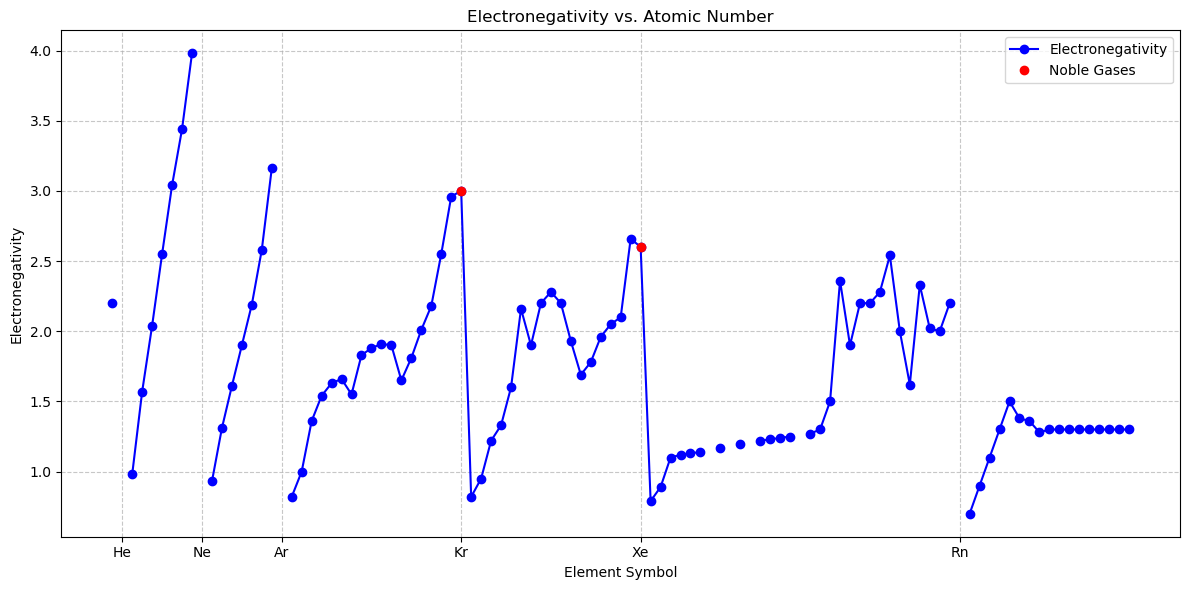

In [34]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect(db_file_path)

# Query to select relevant columns
query = """
SELECT Symbol, AtomicNumber, Electronegativity
FROM elements
ORDER BY AtomicNumber
"""

# Load data into DataFrame
df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Replace missing Electronegativity values with np.nan
df['Electronegativity'] = df['Electronegativity'].replace({None: np.nan})

# List of noble gases
noble_gases = ['He', 'Ne', 'Ar', 'Kr', 'Xe', 'Rn']

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df['AtomicNumber'], df['Electronegativity'], 'o-', label='Electronegativity', color='b')

# Highlight noble gases
noble_gas_data = df[df['Symbol'].isin(noble_gases)]
plt.plot(noble_gas_data['AtomicNumber'], noble_gas_data['Electronegativity'], 'ro', label='Noble Gases')

# Set x-ticks to show only noble gas symbols
plt.xticks(noble_gas_data['AtomicNumber'], noble_gas_data['Symbol'], rotation=0)

# Labeling
plt.xlabel('Element Symbol')
plt.ylabel('Electronegativity')
plt.title('Electronegativity vs. Atomic Number')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


In [37]:
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect(db_file_path)
conn.row_factory = sqlite3.Row  # Enable accessing columns by name

# Create a cursor object
cursor = conn.cursor()

# Define the query to fetch electronegativity for Kr and Xe
query = """
SELECT Symbol, Electronegativity
FROM elements
WHERE Symbol IN (?, ?)
"""

# Execute the query with parameters
cursor.execute(query, ('Kr', 'Xe'))

# Fetch all matching rows
rows = cursor.fetchall()

# Check if any rows were returned
if rows:
    for row in rows:
        symbol = row['Symbol']
        electronegativity = row['Electronegativity']
        if electronegativity is not None:
            print(f"Element: {symbol}, Electronegativity: {electronegativity}")
        else:
            print(f"Element: {symbol} has no electronegativity value.")
else:
    print("No data found for the specified elements.")

# Close the cursor and connection
cursor.close()
conn.close()


Element: Kr, Electronegativity: 3.0
Element: Xe, Electronegativity: 2.6


In [27]:
import sqlite3
import os

# Define the directory structure
base_data_dir = os.path.expanduser("~/data")  # Parent directory
pubchem_data_dir = os.path.join(base_data_dir, "pubchem_data")  # Subdirectory for PubChem
os.makedirs(pubchem_data_dir, exist_ok=True)  # Ensure directories exist

# Define file paths
db_file_path = os.path.join(pubchem_data_dir, "periodic_table.db")  # Original database
cleanEN_db_file_path = os.path.join(pubchem_data_dir, "cleanEN_periodic_table.db")  # New cleaned database

# Connect to the original database
conn_original = sqlite3.connect(db_file_path)
cursor_original = conn_original.cursor()

# Connect to the new cleaned database
conn_clean = sqlite3.connect(cleanEN_db_file_path)
cursor_clean = conn_clean.cursor()

# Fetch the table schema from the original database
cursor_original.execute("SELECT sql FROM sqlite_master WHERE type='table' AND name='elements'")
table_schema = cursor_original.fetchone()[0]  # Get CREATE TABLE statement

# Modify the schema to include IF NOT EXISTS and handle reserved keywords
table_schema = table_schema.replace("CREATE TABLE", "CREATE TABLE IF NOT EXISTS")
table_schema = table_schema.replace("GroupBlock", '"GroupBlock"')

# Create the table in the new database
cursor_clean.execute(table_schema)

# Copy data from the original database, replacing NULL values in 'Electronegativity' with -1
cursor_clean.execute(f"""
    INSERT INTO elements (
        AtomicNumber, Symbol, Name, AtomicMass, CPKHexColor, ElectronConfiguration,
        Electronegativity, AtomicRadius, IonizationEnergy, ElectronAffinity,
        OxidationStates, StandardState, MeltingPoint, BoilingPoint, Density,
        "GroupBlock", YearDiscovered
    )
    SELECT
        AtomicNumber, Symbol, Name, AtomicMass, CPKHexColor, ElectronConfiguration,
        COALESCE(Electronegativity, -1), AtomicRadius, IonizationEnergy, ElectronAffinity,
        OxidationStates, StandardState, MeltingPoint, BoilingPoint, Density,
        "GroupBlock", YearDiscovered
    FROM elements
""")

# Commit and close connections
conn_clean.commit()
conn_original.close()
conn_clean.close()

print(f"Cleaned database saved as: {cleanEN_db_file_path}")



Cleaned database saved as: /home/rebelford/data/pubchem_data/cleanEN_periodic_table.db


In [29]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect("cleanEN_periodic_table.db")
conn.row_factory = sqlite3.Row  # Access columns by name
cursor = conn.cursor()

# Fetch all records into a DataFrame
query = "SELECT * FROM elements"
df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# List of noble gases
noble_gases = ['He', 'Ne', 'Ar', 'Kr', 'Xe', 'Rn']

# Ensure 'Symbol' column exists
if 'Symbol' not in df.columns:
    print("Error: 'Symbol' column not found in the DataFrame.")
else:
    # Filter the DataFrame for noble gases
    df_noble = df[df['Symbol'].isin(noble_gases)]

    # Check if the filtered DataFrame is empty
    if df_noble.empty:
        print("Error: No matching records found for the specified noble gases.")
    else:
        # Sort the DataFrame by the order of noble_gases list
        df_noble['Symbol'] = pd.Categorical(df_noble['Symbol'], categories=noble_gases, ordered=True)
        df_noble = df_noble.sort_values('Symbol')

        # Plotting
        plt.figure(figsize=(10, 6))
        plt.bar(df_noble['Symbol'], df_noble['Electronegativity'], color='skyblue', edgecolor='black')
        plt.xlabel('Element Symbol')
        plt.ylabel('Electronegativity')
        plt.title('Electronegativity of Noble Gases')
        plt.ylim(0, df_noble['Electronegativity'].max() + 0.5)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()


DatabaseError: Execution failed on sql 'SELECT * FROM elements': no such table: elements

(1, 'H', 'Hydrogen', 1.008, 'FFFFFF', '1s1', 2.2, 120.0, 13.598, 0.754, '+1, -1', 'Gas', 13.81, 20.28, 8.988e-05, 'Nonmetal', '1766')
(2, 'He', 'Helium', 4.0026, 'D9FFFF', '1s2', None, 140.0, 24.587, None, '0', 'Gas', 0.95, 4.22, 0.0001785, 'Noble gas', '1868')
(3, 'Li', 'Lithium', 7.0, 'CC80FF', '[He]2s1', 0.98, 182.0, 5.392, 0.618, '+1', 'Solid', 453.65, 1615.0, 0.534, 'Alkali metal', '1817')
(4, 'Be', 'Beryllium', 9.012183, 'C2FF00', '[He]2s2', 1.57, 153.0, 9.323, None, '+2', 'Solid', 1560.0, 2744.0, 1.85, 'Alkaline earth metal', '1798')
(5, 'B', 'Boron', 10.81, 'FFB5B5', '[He]2s2 2p1', 2.04, 192.0, 8.298, 0.277, '+3', 'Solid', 2348.0, 4273.0, 2.37, 'Metalloid', '1808')
(6, 'C', 'Carbon', 12.011, '909090', '[He]2s2 2p2', 2.55, 170.0, 11.26, 1.263, '+4, +2, -4', 'Solid', 3823.0, 4098.0, 2.267, 'Nonmetal', 'Ancient')
(7, 'N', 'Nitrogen', 14.007, '3050F8', '[He] 2s2 2p3', 3.04, 155.0, 14.534, None, '+5, +4, +3, +2, +1, -1, -2, -3', 'Gas', 63.15, 77.36, 0.0012506, 'Nonmetal', '1772')
(8

In [9]:
conn = sqlite3.connect("periodic_table.db")
conn.row_factory = sqlite3.Row  # Enables named access
cursor = conn.cursor()

cursor.execute("SELECT * FROM elements LIMIT 1")
row = cursor.fetchone()
print(row["symbol"])  # Accesses the column by name

conn.close()

OperationalError: no such table: elements

In [ ]:
cursor.execute("PRAGMA table_info(elements);")
print(cursor.fetchall())  # Check the type of the BoilingPoint column


# Semantic Web: A Scientific Data Perspective
The **Semantic Web** is an extension of the traditional World Wide Web that enables machines to understand and process data in a structured and meaningful way. It transforms the web from a collection of documents intended for human reading into a globally linked network of **structured data** that software can interpret, query, and reason over.

At the heart of the Semantic Web are **linked data technologies**, which define **data relationships** instead of just formatting data into tables or files. The Semantic Web allows Python scripts to query machine-readable datasets. This means scientists can directly access structured data on molecules, atmospheric data, physical constants, and more. The key components include:

1. **RDF (Resource Description Framework)**
   - The **data model** of the Semantic Web.
   - Represents **facts as triples**: **subject → predicate → object**.
   - Example (Chemical Properties in RDF):
     ```
     <Acetone>   <has_molecular_weight>   "58.08 g/mol"
     ```
   - Enables **machine-readable relationships**, making **chemical knowledge searchable**.

2. **OWL (Web Ontology Language)**
   - Extends RDF with **logic & reasoning**.
   - Defines **ontologies**: hierarchical classifications of concepts.
   - Example: If **Acetone is a Ketone**, and **Ketones are Organic Compounds**, OWL **infers** that **Acetone is an Organic Compound**.

3. **SPARQL (Query Language for RDF)**
   - The SQL of the Semantic Web.
   - Allows **querying linked datasets** across the web.

4. **Linked Open Data (LOD)**
   - RDF-based datasets are interlinked across disciplines.
   - **Example Datasets**:
     - **Wikidata** (General knowledge)
     - **PubChem RDF** (Chemical data)
     - **DBpedia** (Structured Wikipedia data)
     - **Gene Ontology** (Biological data)

## **Semantic Web vs Traditional Databases**
| **Feature**          | **Relational Databases (SQL, NoSQL)** | **Semantic Web (RDF, OWL, SPARQL)** |
|--------------------|--------------------------------|--------------------------------|
| **Structure**      | Tables (structured schema)    | Graph-based (triples: subject-predicate-object) |
| **Queries**       | SQL                            | SPARQL |
| **Flexibility**   | Rigid schema                  | Dynamic relationships (easily extendable) |
| **Interoperability** | Limited to specific database engines | Global linking of datasets (LOD cloud) |
| **Examples**      | PostgreSQL, MongoDB           | Wikidata, PubChem RDF, DBpedia |



#  Web Scraping and Databases: A Hybrid Approach
While web scraping is often used to extract data for immediate use, it does not store it. A powerful workflow would be:
- **Scrape data** from online sources.
- **Store it in a structured database (SQL or NoSQL)** for long-term analysis.
- **Query it later** instead of repeatedly scraping.


## Web Scraping as a Data Acquisition Method
Web scraping is a method of extracting **external data** from structured or semi-structured sources on the web and transforming it into a usable format. Unlike databases or file storage, web scraping **does not inherently store data**—it is a way to retrieve and structure data from the web dynamically. It allows access to **data stored in HTML web pages** that might not be available via an API.

### Web Scraping vs. APIs
| Feature         | Web Scraping | APIs |
|---------------|-------------|------|
| **Access** | Extracts data from web pages (HTML tables, text, lists) | Queries structured data from a service (often JSON or XML) |
| **Structure** | Often semi-structured (needs parsing) | Well-structured |
| **Reliability** | Pages may change, breaking the scraper | More stable (unless API changes) |
| **Use Case** | Extracting tables, research data, metadata from articles | Accessing structured datasets (PubChem, NCBI, weather data) |

Thus, **web scraping is an alternative to APIs when structured access is unavailable**.

---

## Web Scraping as a Bridge from Classical Literature to Structured Data
Scientific data has historically been communicated through **journal articles, textbooks, and reports**. Many modern scientific knowledge repositories (e.g., Wikipedia, research databases) still store information in text-based formats rather than structured databases. Web scraping allows you to:

- Extract **tabular data** (like chemical properties from Wikipedia or patents).
- Retrieve **text-based metadata** (such as author names, abstracts, and citations).
- Collect **non-tabular structured information** (like structured web pages with lists of elements).

By applying **text parsing, table extraction, and structured storage**, web scraping allows researchers to **convert human-readable content into machine-readable data**.


In [ ]:
import urllib.request

# URL of a spectral data file (example)
url = "https://physics.nist.gov/PhysRefData/ASD/lines_form.html"

# Download as text
response = urllib.request.urlopen(url)
data = response.read().decode('utf-8')

# Save as a file
with open("nist_spectra.html", "w", encoding="utf-8") as file:
    file.write(data)

print("Download complete!")
